In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import describe
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, ShuffleSplit
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Biomechanical abnormalities
# dataset from kaggle https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients

data = pd.read_csv("/content/drive/My Drive/Semestr 6/Chemometria/Dane/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv")
print(data.head) # -> to visualize structure of DataFrame

y = data['class'].values

X = data.drop('class', axis = 'columns').values

# Data scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

labels = np.unique(y)


Porownanie predykcji treningowy vs testowy
Accuracy (train): 0.86
Accuracy (test): 0.85

Recall score 'Normal' (test): 0.85 

Precision score 'Normal' (test): 0.87

F1 score 'Normal' (test): 0.85

Classification report: 
                    precision    recall  f1-score   support

           Hernia       0.70      0.82      0.76        17
           Normal       0.73      0.81      0.77        27
Spondylolisthesis       1.00      0.88      0.93        49

         accuracy                           0.85        93
        macro avg       0.81      0.84      0.82        93
     weighted avg       0.87      0.85      0.85        93


Confusion matrix
                    Hernia  Normal  Spondylolisthesis
Hernia                 14       3                  0
Normal                  5      22                  0
Spondylolisthesis       1       5                 43


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'Normal') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


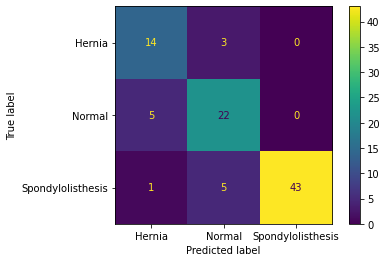


CV Accuracy:  [0.8172043  0.87096774 0.78494624 0.86021505 0.90322581 0.83870968
 0.83870968 0.84946237 0.8172043  0.84946237 0.87096774 0.86021505
 0.84946237 0.84946237 0.84946237 0.82795699 0.8172043  0.89247312
 0.82795699 0.86021505 0.82795699 0.78494624 0.87096774 0.89247312
 0.80645161]
CV Mean Acc: 0.84
CV Std Acc:  0.03012
Crossval confusion matrix: 
                    Hernia  Normal  Spondylolisthesis
Hernia                 46      18                  4
Normal                 14      79                  5
Spondylolisthesis       0       3                141


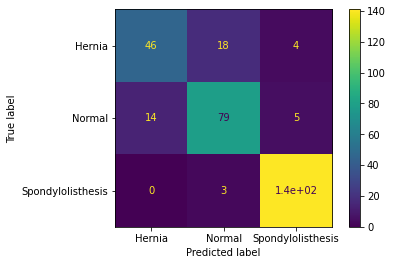

In [ ]:
# Create instance of LogisticRegression (after testing few different models this model proved to be the best)
model = LogisticRegression(penalty = 'l2', solver = 'sag', class_weight = 'balanced', max_iter = 1500)

# Train test split 0.7/0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Train model
model.fit(X_train, y_train)

# Predict train
y_pred_train = model.predict(X_train)

# Predict test
y_pred_test = model.predict(X_test)

# Predict train vs predict test to see if model is overfitted
print("Comparison between train and test accuracy scores to see if model is overfitted")
print("Accuracy (train): {acc:.2f}".format(acc = accuracy_score(y_train, y_pred_train)))
print("Accuracy (test): {acc:.2f}".format(acc = accuracy_score(y_test, y_pred_test)))

# Recall score
print("\nRecall score 'Normal' (test): {rec:.2f} ".format(rec = recall_score(y_test, y_pred_test, pos_label = 'Normal', average = 'weighted')))

# Precision score
print("\nPrecision score 'Normal' (test): {prec:.2f}".format(prec = precision_score(y_test, y_pred_test, pos_label = 'Normal', average = 'weighted')))

# F1 score
print("\nF1 score 'Normal' (test): {f1:.2f}".format(f1 = f1_score(y_test, y_pred_test, average = 'weighted')))

# Classification report
print("\nClassification report: \n", classification_report(y_test, y_pred_test, labels = labels))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels)
print("\nConfusion matrix\n", pd.DataFrame(cm, columns = labels, index = labels))
pcm = plot_confusion_matrix(model, X_test, y_test, labels = labels)
ConfusionMatrixDisplay(pcm, display_labels = labels)
plt.show()


# Crossvalidation
cv = ShuffleSplit(n_splits = 25, test_size = 0.3)
scores = cross_val_score(model, X, y, cv = cv)

print("\nCV Accuracy: ", scores)
print("CV Mean Acc: {mean:.2f}".format(mean = scores.mean()))
print("CV Std Acc: {std: .5f}".format(std = scores.std()))

# Crossvalidation prediction and confusion matrix
y_pred_cv = cross_val_predict(model, X, y, cv = 25)
cm = confusion_matrix(y_pred_cv, y, labels = labels)
print("Crossval confusion matrix: \n", pd.DataFrame(data = cm, index = labels, columns = labels))

pcm = ConfusionMatrixDisplay(cm, display_labels = labels)
pcm.plot()
plt.show()


# Model is not showing very good results (precision is very different for Hernia and Normal vs Spondylolisthesis)
# Recall is approximately on the same level for all classes 
# High precision for Spondylolisthesis suggests that if a model will classify one patient to have Spondylolisthesis there is a high chance of that being true
# but it will not detect all patients with Spondylolisthesis